# Project2 ---Quantum Fourier Transform 
### Xichen Li, EE521 - Group 5


## Quantum Fourier Transform

Quantum Fourier Transform is a quantum implementation of the discrete Fourier transform. As we all know that Fourier Analysis is a tool to describe the internal frequencies of a function. Quantum Fourier Transform is the quantum analogue of the discrete Fourier transfrom which performs a linear transformation on quantum bits. <br>

Quantum Fourier Transform (QFT) is exponentially faster than the famous Fast Fourier Transform (FFT) of classical computers. In a quantum computer, the duscrete fourier transform (DFT) can be implemented as a quantum circuit consisting of only $O(n^2)$ Hadamard gates and controlled phase gates. However, the classical DFT takes $O(n2^n)$ gates.  

### QFT Operation
Similar to DFT, the QFT acts on a quantum state $|X>=\sum \limits_{i=0}^{N-1}x_i|i>$ to its Fourier transform $|Y>=\sum \limits_{k=0}^{N-1}y_k|k>$. And $y_k$ can be expressed as:
$$y_k=\frac{1}{\sqrt{N}} \sum \limits_{n=0}^{N-1}x_n w_N ^{nk}, \ \ k=0,1,2, ... N-1$$
where $w_N ^{nk}=e^{i2\pi\frac{nk}{N}}$

The inverse QFT acts similarly but with:
$$x_n=\frac{1}{\sqrt{N}} \sum \limits_{k=0}^{N-1}y_k w_N ^{-nk}, \ \ n=0,1,2, ... N-1$$


The process of QFT can also be expressed as a mapping process:
$$QFT: |X>=\sum \limits_{i=0}^{N-1}x_i|i> --> |Y>=\sum \limits_{k=0}^{N-1}y_k|k> $$
$$QFT: |X>=\sum \limits_{i=0}^{N-1}x_i|i> --> |Y>=\frac{1}{\sqrt{N}}\sum \limits_{k=0}^{N-1} \sum \limits_{i=0}^{N-1}x_i w_N ^{ik}|k> $$
$$QFT: |i> --> \frac{1}{\sqrt{N}}\sum \limits_{k=0}^{N-1} w_N ^{ik}|k> $$

The mapping process of QFT can also be intuitively viewed as a transformation between two bases. As we know H-gate can transform between the basis state $|0>$ and $|1>$ to the basis $|+>$ and $|->$. Similarly, the basis states in the QFT should be able to transformed by using those qubit gate operation. These process can be symbolically expressed as:
$$QFT|x> = |\hat{x}>$$

According to the definition of $y_k=\frac{1}{\sqrt{N}} \sum \limits_{n=0}^{N-1}x_n w_N ^{nk}, \ \ k=0,1,2, ... N-1$, the QFT operation can be written in a matrix format :
$$QFT_{N}= \frac{1}{\sqrt{N}} \begin{pmatrix} 1 & 1 & 1 & 1 & ... & 1 \\
1 & w & w^2 & w^3 & ... & w^{N-1} \\
1 & w^2 & w^4 & w^6 & ... & 2^{2(N-1)} \\
1 & w^3 & w^6 & w^9 & ... & 2^{3(N-1)} \\
... & ... & ... & ... & ... & ... \\
1 & w^{N-1} & w^{2(N-1)} & w^{3(N-1)} & ... & 2^{(N-1)(N-1)} \\
\end{pmatrix}$$

If we re-write do some simplication with the martrix form of $QFT_N$ and re-write it to a form more close to qubits (a tensor product of qubit), $QFT_N$ can be re-written as:
$$QFT|x_1x_2x_3 ... x_n>=\frac{1}{\sqrt N} (|0> + e^{2\pi i [0,x_n]}|1>)\otimes (|0> + e^{2\pi i [0,x_{n-1} x_n]}|1>) \otimes ... \otimes (|0> + e^{2\pi i [0,x_1,x_2,...x_n]}|1>)$$
where $[0,x_1,...,x_m]=\sum \limits_{k=1}^{m}x_k2^{-k}$

The expression above implies the QFT can be implemented by the Hadamard gate ($H$) and phase gate $R_n$, where $H=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ and $R_n=\begin{pmatrix} 1 & 0 \\ 0 & e^{2\pi i/N} \end{pmatrix}$. <br>
The figure below shows a circuit that can implement an N point QFT. It is important to note that the order of the qubits is reversed in the output state.

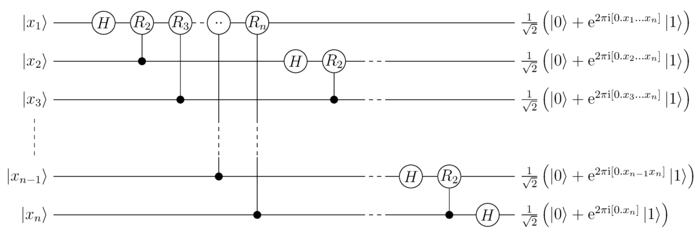

### Example: 1-qubit  QFT $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$
In this case $x_0 = \alpha$, $x_1 = \beta$, and then
$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times0}{2}\right) + \beta \exp\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$
$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha \exp\left(2\pi i\frac{0\times1}{2}\right) + \beta \exp\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$
This can also be written as a matrice form:
$$|y_1y_2>=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}|x_1x_2>=H|x_1x_2>$$
This matches with the expression derived earlier for N=2.


### Example: 4-qubit QFT $\vert y_4y_3y_2y_1\rangle = QFT_8\vert x_4x_3x_2x_1\rangle$
According to the general expression derived earlier:
$$QFT|x_1x_2x_3x_4>=\frac{1}{\sqrt N} (|0> + e^{2\pi i [0,x_4]}|1>)\otimes (|0> + e^{2\pi i [0,x_{3} x_4]}|1>)  \otimes (|0> + e^{2\pi i [0,x_2,x_3,x_4]}|1>) \otimes (|0> + e^{2\pi i [0,x_1,x_2,x_3,x_4]}|1>)$$
And this can also be written as an expanded form:
$$
QFT|x_1x_2x_3x_4> = 
\frac{1}{\sqrt{2}}\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_4
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_4 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_4 + \frac{2\pi i}{2^2}x_3 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^4}x_4 + \frac{2\pi i}{2^3}x_3 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
$$
Note that the order of the qubits needs to be reversed in the output state. 

### Quantum Circuit Implementation in Qiskit

In [18]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit import BasicAer # for simulating circuits
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit import execute
#from qiskit_textbook.widgets import scalable_circuit

#### Define a general qft rotation:

In [19]:
def qft_rotations(circuit, n):
    #Performs qft on the first n qubits in circuit (without swaps)
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

In [20]:
n=4
q = QuantumRegister(n, 'q') # specify the number of qubits in the register and a name
circ = QuantumCircuit(q)
circ.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

In [21]:
qft_rotations(circ , 4)
circ.draw()

┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘

In [22]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [23]:
# swap the output
for qubit in range(n//2):
    circ.swap(qubit, n-qubit-1)

    
#q = QuantumRegister(n, 'q') # specify the number of qubits in the register and a name
#circ = QuantumCircuit(q)
#qft(circ,n)
circ.draw()


┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

#### Test with an input sequence $1001$:

In [24]:
n=4
q = QuantumRegister(n, 'q') # specify the number of qubits in the register and a name
circ = QuantumCircuit(q)
circ.x(0)
circ.x(3)
circ.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [25]:
qft(circ,n)
circ.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     └───┘      │                               │                ┌───┐ │P(π/2) »
q_1: ───────────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
                │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ───────────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ┌───┐┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
«     ┌───┐   
«q_0: ┤ H ├─X─
«     └───┘ │ 
«q_1: ──X───┼─
«       │   │ 
«q_2: ──X───┼─
«           │ 
«q_3: ──────X─
«

In [26]:
circ.h(q[0])
circ.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     └───┘      │                               │                ┌───┐ │P(π/2) »
q_1: ───────────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
                │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ───────────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ┌───┐┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
«     ┌───┐   ┌───┐
«q_0: ┤ H ├─X─┤ H ├
«     └───┘ │ └───┘
«q_1: ──X───┼──────
«       │   │      
«q_2: ──X───┼──────
«           │      
«q_3: ──────X──────
«

In [27]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [28]:
result = job.result()
outputstate = result.get_statevector(circ, decimals=8)
print(outputstate)
probs = np.abs(outputstate)**2
print(probs)

[ 0.01345632-0.06764951j  0.34009707+0.06764951j  0.05735049-0.03832037j
  0.19264951+0.28832037j  0.06764951+0.01345632j -0.06764951+0.34009707j
  0.03832037+0.05735049j -0.28832037+0.19264951j -0.01345632+0.06764951j
 -0.34009707-0.06764951j -0.05735049+0.03832037j -0.19264951-0.28832037j
 -0.06764951-0.01345632j  0.06764951-0.34009707j -0.03832037-0.05735049j
  0.28832037-0.19264951j]
[0.00475753 0.12024247 0.00475753 0.12024247 0.00475753 0.12024247
 0.00475753 0.12024247 0.00475753 0.12024247 0.00475753 0.12024247
 0.00475753 0.12024247 0.00475753 0.12024247]


<IPython.core.display.Javascript object>


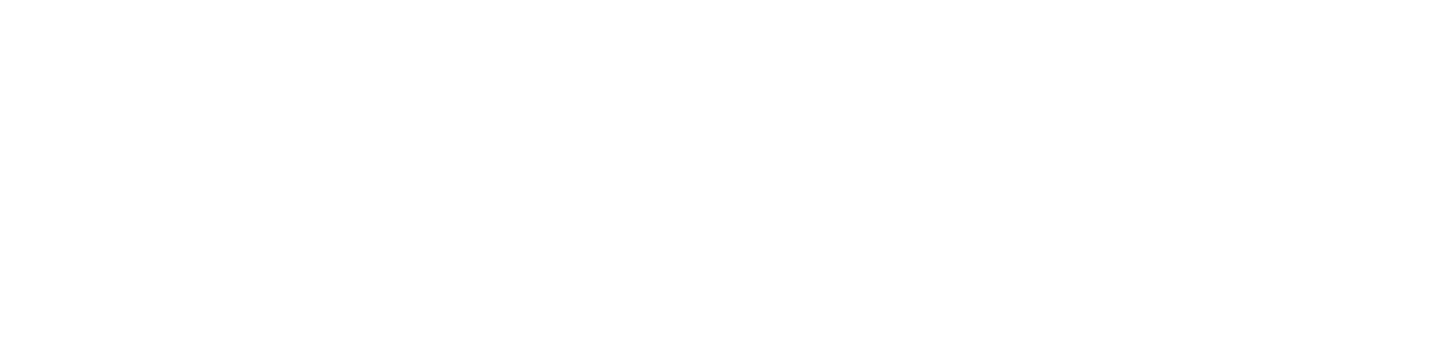

<IPython.core.display.Javascript object>


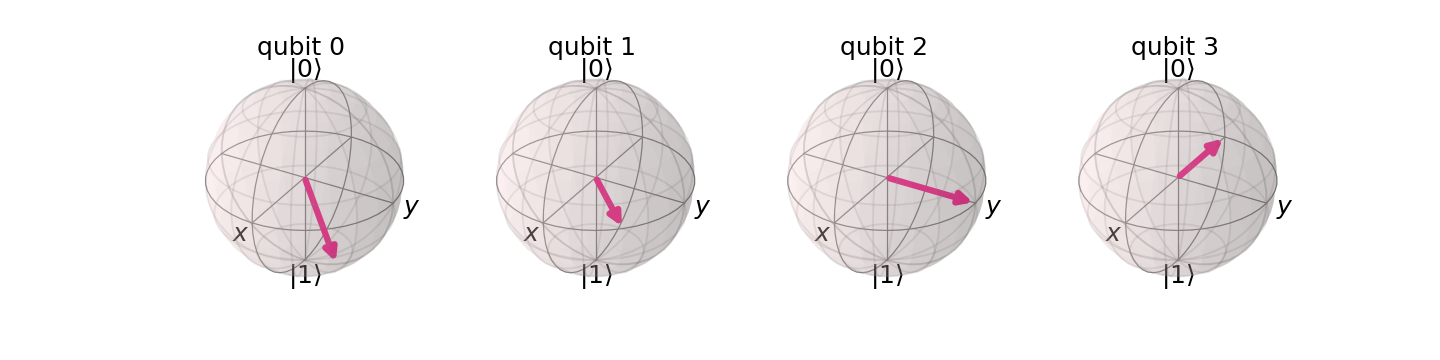

In [29]:
sim = Aer.get_backend("aer_simulator")
circ.save_statevector()
statevector = sim.run(circ).result().get_statevector()
plot_bloch_multivector(statevector)

In [30]:
c = ClassicalRegister(n, 'c')
circ.add_register(c)
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])
circ.measure(q[2], c[2])
circ.measure(q[3], c[3])

circ.draw()

┌───┐                                                                     »
q_0: ┤ X ├──────■───────────────────────────────■──────────────────────■───────»
     └───┘      │                               │                ┌───┐ │P(π/2) »
q_1: ───────────┼────────■──────────────────────┼────────■───────┤ H ├─■───────»
                │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         »
q_2: ───────────┼────────┼────────■───────┤ H ├─■────────■─────────────────────»
     ┌───┐┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                »
q_3: ┤ X ├┤ H ├─■────────■────────■────────────────────────────────────────────»
     └───┘└───┘                                                                »
c: 4/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐   ┌───┐ statevector ┌─┐         
«q_0: ┤ H ├─X─┤ H ├──────░──────┤M├─────────
«     └───┘ │ └───┘      ░      └╥┘┌─┐      
«q_1: ──X───┼────────────░───────╫─┤M├──────
«       │   │            ░       ║ └╥┘┌─┐   
«q_2: ──X───┼────────────░───────╫──╫─┤M├───
«           │            ░       ║  ║ └╥┘┌─┐
«q_3: ──────X────────────░───────╫──╫──╫─┤M├
«                        ░       ║  ║  ║ └╥┘
«c: 4/═══════════════════════════╩══╩══╩══╩═
«                                0  1  2  3

In [31]:
#shots = 2048
#transpiled_circ = transpile(circ, backend, optimization_level=3)
#job = backend.run(transpiled_circ, shots=shots)

#result = job.result()

#counts = result.get_counts()
#print(counts)
#plot_histogram(counts)

Have some problems measuring the output state by using the `qasm_simulator` provided in the homework example. Need to fix this in the future. 